In [106]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import lime
from lime import lime_tabular
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import shap

In [107]:
dataset=pd.read_csv('merge.csv')
dataset.head()

,timestamp,date (UTC),NO2 (ppb),VOC (ppb),pm 10 (ug/m3),pm 2.5 (ug/m3),pm 1 (ug/m3),class
0,1680841264,07-04-2023 04:21,58,161,42.242280,36.364796,23.0,1
1,1680841324,07-04-2023 04:22,58,163,44.033030,43.033030,28.0,1
2,1680841384,07-04-2023 04:23,60,162,40.469963,39.469963,28.0,1
3,1680841444,07-04-2023 04:24,58,163,34.787033,33.787033,22.0,1
4,1680841504,07-04-2023 04:25,60,163,45.632010,44.632010,29.0,1


In [108]:
dataset = dataset.drop(dataset.columns[[0, 1]], axis=1)
dataset=dataset.drop(dataset.columns[[5]], axis=1)

In [109]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(dataset)
dataset=imputer.transform(dataset)
X=dataset

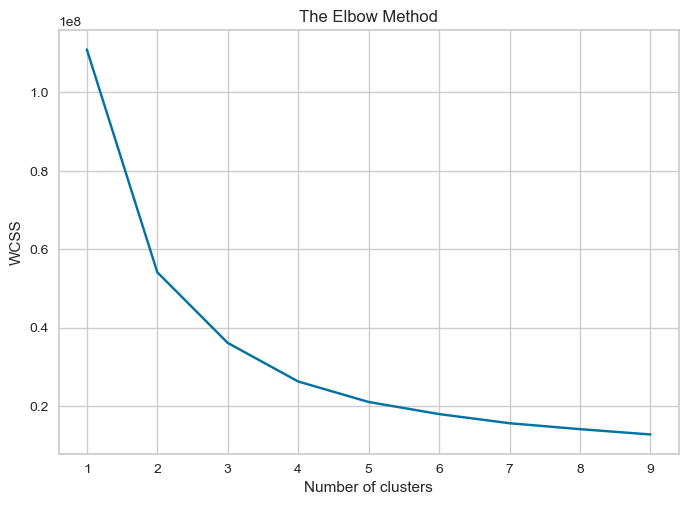

In [110]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [111]:
import numpy as np
import math
import pandas as pd
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans , kmeans_plusplus , MeanShift , DBSCAN , Birch , AffinityPropagation , OPTICS , AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import plotly.graph_objects as go

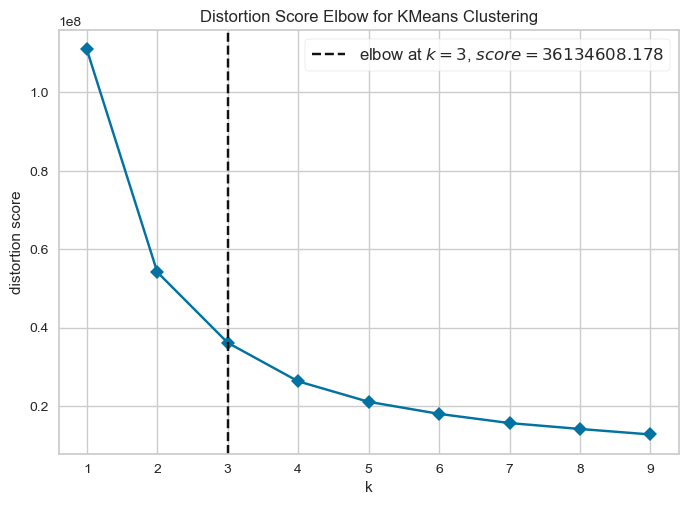

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [112]:
X=np.array(X)
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(X)
visualizer.show()


In [113]:
X.shape

(10558, 5)

In [114]:
kmeans_initial = KMeans(n_clusters=3, random_state=42)
initial_clusters = kmeans_initial.fit_predict(X)
initial_centroids = kmeans_initial.cluster_centers_


In [115]:
df2=pd.read_csv('person-1 data.csv')
df2=df2[1044:2483]

In [142]:
df2.shape

(1439, 5)

In [116]:
df2 = df2.drop(df2.columns[[0, 1]], axis=1)


In [117]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(df2)
df2=imputer.transform(df2)


In [118]:
kmeans_new = KMeans(n_clusters=3, random_state=42, init=initial_centroids)
new_clusters = kmeans_new.fit_predict(df2)

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [119]:
print(new_clusters)

[1 1 1 ... 1 1 1]


In [120]:
count0=0
count1=0
count2=0

for i  in range(0,len(new_clusters)):
    if(new_clusters[i]==0):
        count0+=1
    elif(new_clusters[i]==1):   
        count1+=1
    elif(new_clusters[i]==2):    
        count2+=1
        

In [121]:
print(count0,count1,count2)



177 743 519


In [122]:
print((count0*494.848)+(count1*13.477)+(count2*12.5375),(count0*139.552)+(count1*156.859)+(count2*280.95),(count0*49.895)+(count1*24.50)+(count2*144.42))

104108.4695 287059.991 101988.89499999999


In [123]:
print((count0*5.2)+(1*count1)+(count2*3.6))

3531.8


In [124]:
df3=pd.read_csv('person-3.csv')
df3=df3[472:1911]
df3.shape

(1439, 7)

In [125]:
df3=df3.drop(df3.columns[[0,1]], axis=1)

In [126]:
df3.shape

(1439, 5)

In [127]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(df3)
df3=imputer.transform(df3)

In [128]:
#kmeans_new = KMeans(n_clusters=3, random_state=42, init=initial_centroids)
new_clusters1 = kmeans_new.fit_predict(df3)

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [129]:
count0=0
count1=0
count2=0

for i  in range(0,len(new_clusters1)):
    if(new_clusters1[i]==0):
        count0+=1
    elif(new_clusters1[i]==1):   
        count1+=1
    elif(new_clusters1[i]==2):    
        count2+=1

In [130]:
print((count0*494.848)+(count1*13.477)+(count2*12.5375),(count0*139.552)+(count1*156.859)+(count2*280.95),(count0*49.895)+(count1*24.50)+(count2*144.42))

40013.438 235399.544 46420.765


In [131]:
print(count0,count1,count2)

43 1312 84


In [132]:
print((count0*5.2)+(1*count1)+(count2*3.6))

1838.0


In [143]:
df4=pd.read_csv('person 2.csv')
df4=df4[ 2004:3416]

In [144]:
df4=df4.drop(df4.columns[[0,1,6,7,8,9,11]],axis=1)

In [145]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')

imputer.fit(df4)
df4=imputer.transform(df4)

In [146]:
df4.shape

(1412, 5)

In [147]:
new_clusters2 = kmeans_new.fit_predict(df4)

Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.


In [148]:
count0=0
count1=0
count2=0

for i  in range(0,len(new_clusters2)):
    if(new_clusters2[i]==0):
        count0+=1
    elif(new_clusters2[i]==1):   
        count1+=1
    elif(new_clusters2[i]==2):    
        count2+=1

In [149]:
print(count0,count1,count2)

22 1324 66


In [150]:
print((count0*494.848)+(count1*13.477)+(count2*12.5375),(count0*139.552)+(count1*156.859)+(count2*280.95),(count0*49.895)+(count1*24.50)+(count2*144.42))

29557.678999999996 229294.16000000003 43067.41


In [151]:
print((count0*5.2)+(1*count1)+(count2*3.6))

1676.0
